# Basic Tokenizaton (For Basic Revision)



Opening Text Files

In [ ]:
with open('./drive/MyDrive/gen_ai_training_guide.txt', 'r', encoding='utf-8') as f:
    raw_text=f.read()
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 8727

A Comprehensive Guide to Training Generative AI Models

Table of Contents:
1. Introduction to Gene


Splitting in words

In [ ]:
import re
result = re.split(r'([,.]|\s)', raw_text)
print(result)

['', '\n', 'A', ' ', 'Comprehensive', ' ', 'Guide', ' ', 'to', ' ', 'Training', ' ', 'Generative', ' ', 'AI', ' ', 'Models', '\n', '', '\n', 'Table', ' ', 'of', ' ', 'Contents:', '\n', '1', '.', '', ' ', 'Introduction', ' ', 'to', ' ', 'Generative', ' ', 'AI', ' ', 'Training', '\n', '2', '.', '', ' ', 'Foundational', ' ', 'Concepts', '\n', '3', '.', '', ' ', 'Data', ' ', 'Preparation', '\n', '4', '.', '', ' ', 'Model', ' ', 'Architecture', ' ', 'Selection', '\n', '5', '.', '', ' ', 'Training', ' ', 'Techniques', '\n', '6', '.', '', ' ', 'Scaling', ' ', 'and', ' ', 'Parallelization', '\n', '7', '.', '', ' ', 'Loss', ' ', 'Functions', ' ', 'and', ' ', 'Evaluation', ' ', 'Metrics', '\n', '8', '.', '', ' ', 'Ethical', ' ', 'Considerations', ' ', 'and', ' ', 'Bias', ' ', 'Mitigation', '\n', '9', '.', '', ' ', 'Post-Training', ' ', 'Optimization', ' ', 'and', ' ', 'Fine-Tuning', '\n', '10', '.', '', ' ', 'Deployment', ' ', 'and', ' ', 'Maintenance', '\n', '', '\n', '---', '\n', '', '\n', '1'

Remove Whitespaces

In [ ]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

['A', 'Comprehensive', 'Guide', 'to', 'Training', 'Generative', 'AI', 'Models', 'Table', 'of', 'Contents', ':', '1', '.', 'Introduction', 'to', 'Generative', 'AI', 'Training', '2', '.', 'Foundational', 'Concepts', '3', '.', 'Data', 'Preparation', '4', '.', 'Model']


Keeping whitespaces can be useful if we train models that are sensitive to the exact structure of the text (for example, Python code, which is sensitive to indentation and spacing)

In [ ]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
vocab = {token:integer for integer,token in enumerate(all_words)}

vocab identifies each word in the text with a unique number in the form of python dictionary.

Now, this theory is implemented as a class.

In [ ]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

Testing class SimpleTokenizerV1

In [ ]:
tokenizer = SimpleTokenizerV1(vocab)

text = """Post-Training Optimization and Fine-Tuning"""
ids = tokenizer.encode(text)
print(ids)

[115, 108, 182, 69]


In [ ]:
val=tokenizer.decode(ids)
print(val)

Post-Training Optimization and Fine-Tuning


The Class encodes and decodes on word level properly.

Now testing on a sentence that is not in the file.

In [ ]:
text="Generative models involve training, data augmentation, and evaluation to  robust output quality."
ids=tokenizer.encode(text)
print(ids)
val=tokenizer.decode(ids)
print(val)

[77, 388, 350, 531, 3, 243, 196, 3, 182, 284, 525, 472, 410, 447, 6]
Generative models involve training, data augmentation, and evaluation to robust output quality.


Now, classV2 will accomodate for unknown words

We can modify the tokenizer to use an <|unk|> token if it encounters a word that is not part of the vocabulary.

Also Includes <|endoftext|> char.

In [ ]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}

Here is class SimpleTokenizerV2.

In [ ]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

Testing class V2

In [ ]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Generative models involve training, data augmentation, and evaluation to  robust output quality."
text2 = "In the robust output."

text = " <|endoftext|> ".join((text1, text2))

x=tokenizer.encode(text)
y=tokenizer.decode(x)
print(x)
print(y)

[77, 388, 350, 531, 3, 243, 196, 3, 182, 284, 525, 472, 410, 447, 6, 562, 563, 520, 472, 410, 6]
Generative models involve training, data augmentation, and evaluation to robust output quality. <|endoftext|> <|unk|> the robust output.


So far, we have discussed tokenization as an essential step in processing text as input to LLMs. Depending on the LLM, some researchers also consider additional special tokens such as the following:

[BOS] (beginning of sequence): This token marks the start of a text. It signifies to the LLM where a piece of content begins.

[EOS] (end of sequence): This token is positioned at the end of a text, and is especially useful when concatenating multiple unrelated texts, similar to <|endoftext|>. For instance, when combining two different Wikipedia articles or books, the [EOS] token indicates where one article ends and the next one begins.

[PAD] (padding): When training LLMs with batch sizes larger than one, the batch might contain texts of varying lengths. To ensure all texts have the same length, the shorter texts are extended or "padded" using the [PAD] token, up to the length of the longest text in the batch.

# Byte Pair Encoding

Implementing BPE using  Python open-source library called tiktoken.

In [ ]:
! pip3 install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.3 MB/s eta 0:00:00


In [ ]:
import importlib
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.8.0


Institiating tiktoken for gpt2 BPT

In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")

In [ ]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


Using class TokenizerV2 to decode it back.

In [ ]:
strings = tokenizer.decode(integers)

print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [ ]:
# Initialize the encodings for GPT-2, GPT-3, and GPT-4
encodings = {
    "gpt2": tiktoken.get_encoding("gpt2"),
    "gpt3": tiktoken.get_encoding("p50k_base"),  # Commonly associated with GPT-3 models
    "gpt4": tiktoken.get_encoding("cl100k_base")  # Used for GPT-4 and later versions
}

# Get the vocabulary size for each encoding
vocab_sizes = {model: encoding.n_vocab for model, encoding in encodings.items()}

# Print the vocabulary sizes
for model, size in vocab_sizes.items():
    print(f"The vocabulary size for {model.upper()} is: {size}")

The vocabulary size for GPT2 is: 50257
The vocabulary size for GPT3 is: 50281
The vocabulary size for GPT4 is: 100277


# Input-Target Pairs

 A data loader that fetches the input-target pairs using a sliding window approach.

In [ ]:
with open("/content/drive/MyDrive/gen_ai_training_guide.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)

Creating the input-target pairs for the nextword prediction task is to create two variables, x and y, where x contains the input tokens and y contains the targets, which are the inputs shifted by 1

In [ ]:
enc_sample = enc_text[50:]
context_size = 4
#The input x is the first 4 tokens [1, 2, 3, 4], and the target y is the next 4 tokens [2, 3, 4, 5]

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [13, 1446, 4272, 290]
y:      [1446, 4272, 290, 42945]


# Data Loader

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.9 MB/s eta 0:00:00


In [ ]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

The function create_dataloader_v1 uses the class GPTDatasetV1 and returns a dataloader object.

In [ ]:
import tiktoken

def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

Testing DataLoader

In [ ]:
import torch

with open('./drive/MyDrive/gen_ai_training_guide.txt', 'r', encoding='utf-8') as f:
    raw_text=f.read()

print("PyTorch version:", torch.__version__)
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

PyTorch version: 2.5.0+cu121
[tensor([[  198,    32, 40917, 10005]]), tensor([[   32, 40917, 10005,   284]])]


# Token Embeddings

Taking a small vocab size.

In [ ]:
vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

NameError: name 'torch' is not defined

We can see that the weight matrix of the embedding layer contains small, random values. These values are optimized during LLM training as part of the LLM optimization itself, as we will see in upcoming chapters. Moreover, we can see that the weight matrix has six rows and three columns. There is one row for each of the six possible tokens in the vocabulary. And there is one column for each of the three embedding dimensions.

The following code creates vector embedding to capture semanticmeanings of BP Tokens

In [ ]:
print(embedding_layer(input_ids))

# Positional Embeddings
The following is to find meanings of tokens depending on where they occur in the sentence.

In [ ]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

Using the token_embedding_layer above, if we sample data from the data loader, we embed each token in each batch into a 256-dimensional vector. If we have a batch size of 8 with four tokens each, the result will be an 8 x 4 x 256 tensor.

In [ ]:
max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

We can see the token id tensor is 8x4 and embedding vector becomes 8x4x256.
this means each batch has 4 tokens and for each token, 256 different dimensions have numbers resulting the importance of that token in that dimension.

For a GPT model's absolute embedding approach, we just need to create another embedding layer that has the same dimension as the token_embedding_layer:

In [ ]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

The context_length is a variable that represents the supported input size of the LLM.

Here, we choose it similar to the maximum length of the input text.

In practice, input text can be longer than the supported context length, in which case we have to truncate the text.

As we can see, the positional embedding tensor consists of four 256-dimensional vectors. We can now add these directly to the token embeddings, where PyTorch will add the 4x256- dimensional pos_embeddings tensor to each 4x256-dimensional token embedding tensor in each of the 8 batches:

In [ ]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

# Self Attention Mechanism (Basics)

Implementing self attention on already embedded 3D tensor.

In [ ]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_coords = inputs[:, 0].tolist()
y_coords = inputs[:, 1].tolist()
z_coords = inputs[:, 2].tolist()

words = ["Your", "journey", "starts", "with", "one", "step"]

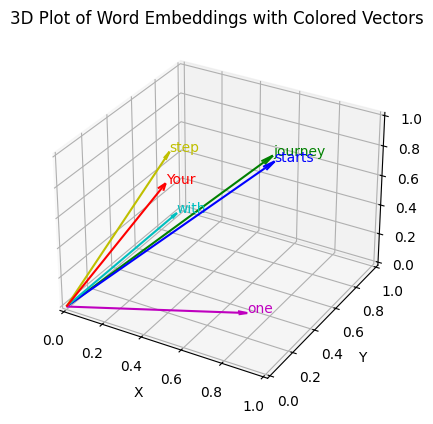

In [ ]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()


To find the closeness or relativity of two tokens is taken by the dot product of their encodings since it is a measure of cosine of the angle formed between the two vectors. So Attention weight tensor is a tensor with dot product with transpose matrixes transpose.

In [ ]:
query = inputs[1]  # 2nd input token is the query

attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query) # dot product (transpose not necessary here since they are 1-dim vectors)

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


Softmax approach is better at managing extreme values and offers more favorable gradient properties during training of LLM.

In [ ]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)

print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In addition, the softmax function ensures that the attention weights are always positive. This makes the output interpretable as probabilities or relative importance, where higher weights indicate greater importance.

Note that this naive softmax implementation (softmax_naive) may encounter numerical instability problems, such as overflow and underflow, when dealing with large or small input values.

Therefore, in practice, it's advisable to use the PyTorch implementation of softmax, which has been extensively optimized for performance:

In [ ]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)

The context vector z(2)is calculated as a weighted sum of all input vectors.

This involves multiplying each input vector by its corresponding attention weight:

In [ ]:
query = inputs[1] # 2nd input token is the query

context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)

Extending this approach to the whole sentence.

In [ ]:
attn_scores = inputs @ inputs.T
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In the last step, we now use these attention weights to compute all context vectors via matrix multiplication:

In [ ]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


# Implementing Self Attention with trainable weights

Note that in GPT-like models, the input and output dimensions are usually the same.

But for illustration purposes, to better follow the computation, we choose different input (d_in=3) and output (d_out=2) dimensions here.

In [ ]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

x_2 = inputs[1] #A
d_in = inputs.shape[1] #B
d_out = 2 #C

Next, we initialize the three weight matrices Wq, Wk and Wv

In [ ]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=True)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=True)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=True)
print(W_query)
print(W_key)
print(W_value)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]], requires_grad=True)
Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]], requires_grad=True)
Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]], requires_grad=True)


Computing Query, Key and Value matrices

In [ ]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value

Computing keys, queries and values using input in order to get attention weights.

In [ ]:
keys = inputs @ W_key
values = inputs @ W_value
queries = inputs @ W_query

Calculating attention score.

In [ ]:
attn_scores_2 = query_2 @ keys.T
attn_scores = queries @ keys.T
print(attn_scores_2)

Now we normalize using softmax, but we divide by root of dimension for

Reason 1: For stability in learning

The softmax function is sensitive to the magnitudes of its inputs. When the inputs are large, the differences between the exponential values of each input become much more pronounced. This causes the softmax output to become "peaky," where the highest value receives almost all the probability mass, and the rest receive very little.

In attention mechanisms, particularly in transformers, if the dot products between query and key vectors become too large (like multiplying by 8 in this example), the attention scores can become very large. This results in a very sharp softmax distribution, making the model overly confident in one particular "key." Such sharp distributions can make learning unstable,

Reason 2: To make the variance of the dot product stable

The dot product of Q and K increases the variance because multiplying two random numbers increases the variance.

The increase in variance grows with the dimension.

Dividing by sqrt (dimension) keeps the variance close to 1

In [ ]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)
print(d_k)

NameError: name 'keys' is not defined

We now compute the context vector as a weighted sum over the value vectors.

Here, the attention weights serve as a weighting factor that weighs the respective importance of each value vector.

We can use matrix multiplication to obtain the output in one step:

In [ ]:
context_vec_2 = attn_weights_2 @ values

# Self Attention Class

In [ ]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):

    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key   = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))

    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value

        attn_scores = queries @ keys.T # omega
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )

        context_vec = attn_weights @ values
        return context_vec

In [ ]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

Since inputs contains six embedding vectors, we get a matrix storing the six context vectors, as shown in the above result.

As a quick check, notice how the second row ([0.3061, 0.8210]) matches the contents of context_vec_2 in the previous section.

We can improve the SelfAttention_v1 implementation further by utilizing PyTorch's nn.Linear layers, which effectively perform matrix multiplication when the bias units are disabled.

Additionally, a significant advantage of using nn.Linear instead of manually implementing nn.Parameter(torch.rand(...)) is that nn.Linear has an optimized weight initialization scheme, contributing to more stable and effective model training.

In [ ]:
class SelfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values
        return context_vec

SelfAttention_v2 usage

In [ ]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

# HIDING FUTURE WORDS WITH CAUSAL ATTENTION

In [ ]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

queries = sa_v2.W_query(inputs) #A
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

We create a mask and multiple it with attention weights to find out the mask

In [ ]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
masked_simple = attn_weights*mask_simple
# Renormalizing
row_sums = masked_simple.sum(dim=1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

Implementing a better mask using softmax normalization, we would need a negative infinity upper triangle in the attention matrix


In [ ]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

Masking in Transformers sets scores for future tokens to a large negative value, making their influence in the softmax calculation effectively zero.

The softmax function then recalculates attention weights only among the unmasked tokens.

This process ensures no information leakage from masked tokens, focusing the model solely on the intended data.

We could now use the modified attention weights to compute the context vectors via context_vec = attn_weights @ values.

we first cover another minor tweak to the causal attention mechanism that is useful for reducing overfitting when training LLMs.

# MASKING ADDITIONAL ATTENTION WEIGHTS WITH DROPOUT


For illustration, drop rate of 0.5 whereas to train GPT, we use 0.1-0.2 drop rate.

In [ ]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) #A
example = torch.ones(6, 6) #B
print(dropout(example))

When applying dropout to an attention weight matrix with a rate of 50%, half of the elements in the matrix are randomly set to zero.

To compensate for the reduction in active elements, the values of the remaining elements in the matrix are scaled up by a factor of 1/0.5 =2.

This scaling is crucial to maintain the overall balance of the attention weights, ensuring that the average influence of the attention mechanism remains consistent during both the training and inference phases.

In [ ]:
torch.manual_seed(123)
print(dropout(attn_weights))

# A COMPACT CAUSAL ATTENTION CLASS

Before we begin, one more thing is to ensure that the code can handle batches consisting of more than one input.

This will ensure that the CausalAttention class supports the batch outputs produced by the data loader we implemented earlier.

For simplicity, to simulate such batch inputs, we duplicate the input text example:

2 inputs with 6 tokens each, and each token has embedding dimension 3

In [ ]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

This results in a 3D tensor consisting of 2 input texts with 6 tokens each, where each token is a 3-dimensional embedding vector.

The following CausalAttention class is similar to the SelfAttention class we implemented earlier, except that we now added the dropout and causal mask components as highlighted in the following code.

Step 1: Compared to the previous SelfAttention_v1 class, we added a dropout layer.

Step 2: The register_buffer call is also a new addition (more information is provided in the following text).

Step 3: We transpose dimensions 1 and 2, keeping the batch dimension at the first position (0).

Step 4: In PyTorch, operations with a trailing underscore are performed in-place, avoiding unnecessary memory copies

In [ ]:
class CausalAttention(nn.Module):

    def __init__(self, d_in, d_out, context_length,
                 dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout) # New
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1)) # New

    def forward(self, x):
        b, num_tokens, d_in = x.shape # New batch dimension b
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.transpose(1, 2) # Changed transpose
        attn_scores.masked_fill_(  # New, _ ops are in-place
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)  # `:num_tokens` to account for cases where the number of tokens in the batch is smaller than the supported context_size
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights) # New

        context_vec = attn_weights @ values
        return context_vec

The use of register_buffer in PyTorch is not strictly necessary for all use cases but offers several advantages here.

For instance, when we use the CausalAttention class in our LLM, buffers are automatically moved to the appropriate device (CPU or GPU) along with our model, which will be relevant when training the LLM in future chapters.

This means we don't need to manually ensure these tensors are on the same device as your model parameters, avoiding device mismatch errors.

In [ ]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)
print(context_vecs)

# MULTI-HEAD ATTENTION

implementing multi-head attention involves creating multiple instances of the self-attention mechanism, each with its own weights, and then combining their outputs

In code, we can achieve this by implementing a simple MultiHeadAttentionWrapper class that stacks multiple instances of our previously implemented CausalAttention module:

In [ ]:
class MultiHeadAttentionWrapper(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
             for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)


For example, if we use this MultiHeadAttentionWrapper class with two attention heads (via num_heads=2) and CausalAttention output dimension d_out=2, this results in a 4- dimensional context vectors (d_out*num_heads=4)

In [ ]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

In [ ]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens = 6
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

# MULTI-HEAD ATTENTION WITH WEIGHT SPLITS

Instead of maintaining two separate classes, MultiHeadAttentionWrapper and CausalAttention, we can combine both of these concepts into a single MultiHeadAttention class.

In the MultiHeadAttentionWrapper, multiple heads are implemented by creating a list of CausalAttention objects (self.heads), each representing a separate attention head.

The CausalAttention class independently performs the attention mechanism, and the results from each head are concatenated.

In contrast, the following MultiHeadAttention class integrates the multi-head functionality within a single class.

It splits the input into multiple heads by reshaping the projected query, key, and value tensors and then combines the results from these heads after computing attention.


In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

Step 1: Reduce the projection dim to match desired output dim

Step 2: Use a Linear layer to combine head outputs

Step 3: Tensor shape: (b, num_tokens, d_out)

Step 4: We implicitly split the matrix by adding a num_heads dimension. Then we unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)

Step 5: Transpose from shape (b, num_tokens, num_heads, head_dim) to (b, num_heads, num_tokens, head_dim)

Step 6: Compute dot product for each head

Step 7: Mask truncated to the number of tokens

Step 8: Use the mask to fill attention scores

Step 9: Tensor shape: (b, num_tokens, n_heads, head_dim)

Step 10: Combine heads, where self.d_out = self.num_heads * self.head_dim

Step 11: Add an optional linear projection

In [ ]:
torch.manual_seed(123)

# Define the tensor with 3 rows and 6 columns
inputs = torch.tensor(
    [[0.43, 0.15, 0.89, 0.55, 0.87, 0.66],  # Row 1
     [0.57, 0.85, 0.64, 0.22, 0.58, 0.33],  # Row 2
     [0.77, 0.25, 0.10, 0.05, 0.80, 0.55]]  # Row 3
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

batch_size, context_length, d_in = batch.shape
d_out = 6
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

Let’s break down how query, key, and value tensors are split and processed in **Multi-Head Attention (MHA)**, a core concept in transformer architectures. This explanation uses PyTorch and aims for clarity.

---

### **Step 1: Input Transformation**
Before the input data is split into multiple attention heads, it's first passed through linear layers to generate **query**, **key**, and **value** tensors. Each of these tensors has the shape `(batch_size, num_tokens, d_out)`, where:
- `batch_size` is the number of input sequences.
- `num_tokens` is the number of tokens in each sequence.
- `d_out` is the total output dimension.

---

### **Step 2: Splitting into Multiple Heads**
Multi-head attention divides `d_out` into smaller chunks, one for each head. The number of heads is `num_heads`, and each head gets a dimension `head_dim`, calculated as:
\[
\text{head_dim} = \frac{\text{d_out}}{\text{num_heads}}
\]

The splitting is done using **reshaping** and **transposing**:
1. **Reshaping**:
   The tensor `(batch_size, num_tokens, d_out)` is reshaped to `(batch_size, num_tokens, num_heads, head_dim)` using the `.view()` method. This separates `d_out` into `num_heads` smaller groups.

2. **Transposing**:
   After reshaping, the dimensions are rearranged to bring `num_heads` before `num_tokens`. This makes the tensor shape `(batch_size, num_heads, num_tokens, head_dim)`. This step is essential to align queries, keys, and values for parallel processing across multiple heads.

---

### **Step 3: Performing Attention**
Once the tensors are split into heads, attention is computed for each head. The dot-product attention mechanism uses the reshaped and transposed tensors to calculate:
\[
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{\text{head_dim}}}\right)V
\]
This involves batched matrix multiplications, which are now efficient due to the structured shape of the tensors.

---

### **Step 4: Combining Head Outputs**
After attention weights and context vectors are computed for all heads, the output tensors are **transposed back** to the shape `(batch_size, num_tokens, num_heads, head_dim)`. Then, they are **flattened** (or reshaped) to merge the multiple heads back into one dimension, resulting in a shape of `(batch_size, num_tokens, d_out)`.

---

### **Step 5: Output Projection**
Finally, the combined output is passed through an **output projection layer** (a linear layer). This step is optional but common in architectures like transformers because it helps further process the combined attention output.

---

### **Why Multi-Head Attention is Efficient**
In the **MultiHeadAttention** implementation:
- The queries, keys, and values are computed using a **single matrix multiplication** (e.g., `keys = self.W_key(x)`), regardless of the number of heads. This is faster and more efficient than computing these tensors separately for each head.

In contrast, a simpler implementation like **MultiHeadAttentionWrapper** would need to repeat this expensive matrix multiplication for each head, making it slower.

---

### **Summary**
1. Inputs are transformed into queries, keys, and values.
2. Tensors are reshaped and transposed to split across attention heads.
3. Attention is computed for each head in parallel.
4. Outputs from all heads are combined and passed through an optional output projection layer.
5. This design ensures both efficiency and flexibility, which is why it's used in state-of-the-art models like transformers.

# GPT MODEL FROM SCRATCH TO GENERATE TEXT

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

## GPT ARCHITECTURE PART 1: DUMMY GPT MODEL CLASS

Step 1: Use a placeholder for TransformerBlock

Step 2: Use a placeholder for LayerNorm

In [ ]:
import torch
import torch.nn as nn


class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # Use a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        # Use a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits


class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder

    def forward(self, x):
        # This block does nothing and just returns its input.
        return x


class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters here are just to mimic the LayerNorm interface.

    def forward(self, x):
        # This layer does nothing and just returns its input.
        return x

The forward method describes the data flow through the model: it computes token and positional embeddings for the input indices, applies dropout, processes the data through the transformer blocks, applies normalization, and finally produces logits with the linear output layer.

In [ ]:
# Tokenization
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

In [ ]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

The embedding has 50,257 dimensions because each of these dimensions refers to a unique token in the vocabulary. At the end of this chapter, when we implement the postprocessing code, we will convert these 50,257-dimensional vectors back into token IDs, which we can then decode into words.

## LAYER NORMALIZATION


In [ ]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

The variable eps is a small constant (epsilon) added to the variance to prevent division by zero during normalization.

The scale and shift are two trainable parameters (of the same dimension as the input) that the LLM automatically adjusts during training if it is determined that doing so would improve the model's performance on its training task.

This allows the model to learn appropriate scaling and shifting that best suit the data it is processing.

we have opted for an implementation detail by setting unbiased=False.

For those curious about what this means, in the variance calculation, we divide by the number of inputs n in the variance formula.

This approach does not apply Bessel's correction, which typically uses n-1 instead of n in the denominator to adjust for bias in sample variance estimation.

This decision results in a so-called biased estimate of the variance.

For large-scale language models (LLMs), where the embedding dimension n is significantly large, the difference between using n and n-1 is practically negligible.

We chose this approach to ensure compatibility with the GPT-2 model's normalization layers and because it reflects TensorFlow's default behavior, which was used to implement the original GPT2 model.

heres how we use the above class

ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)

## GPT ARCHITECTURE PART 3: FEEDFORWARD NEURAL NETWORK WITH GELU ACTIVATION

In [ ]:
import torch.nn as nn
import torch
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))

The diff between RELU and GELU is shown

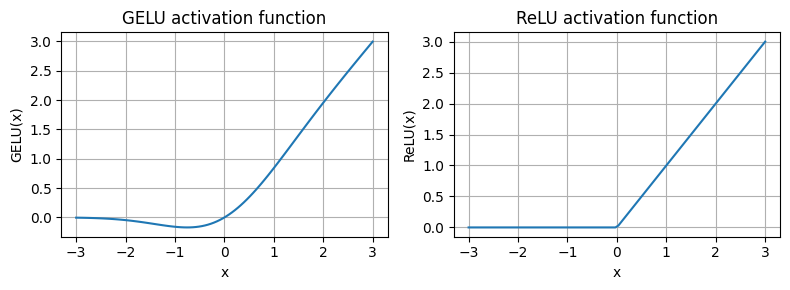

In [ ]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

GELU is a smooth, nonlinear function that approximates ReLU but with a non-zero gradient for negative values.

The smoothness of GELU, as shown in the above figure, can lead to better optimization properties during training, as it allows for more nuanced adjustments to the model's parameters.

In contrast, ReLU has a sharp corner at zero, which can sometimes make optimization harder, especially in networks that are very deep or have complex architectures.

Moreover, unlike RELU, which outputs zero for any negative input, GELU allows for a small, non-zero output for negative values.

This characteristic means that during the training process, neurons that receive negative input can still contribute to the learning process, albeit to a lesser extent than positive inputs.

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layers(x)

The FeedForward module we implemented in this section plays a crucial role in enhancing the model's ability to learn from and generalize the data.

Although the input and output dimensions of this module are the same, it internally expands the embedding dimension into a higher-dimensional space through the first linear layer.

This expansion is followed by a non-linear GELU activation, and then a contraction back to the original dimension with the second linear transformation.

Such a design allows for the exploration of a richer representation space.

## GPT ARCHITECTURE PART 4: SHORTCUT CONNECTIONS

 shortcut connections are important for overcoming the limitations posed by the vanishing gradient problem in deep neural networks.

Shortcut connections are a core building block of very large models such as LLMs, and they will help facilitate more effective training by ensuring consistent gradient flow across layers when we train the GPT model

## CODING ATTENTION AND LINEAR LAYERS IN A TRANSFORMER BLOCK

Step 1: Shortcut connection for attention block

Step 2: Shortcut connection for feed forward block

Step 3: Add the original input back

In [ ]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed forward block
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x

The given code defines a TransformerBlock class in PyTorch that includes a multi-head attention mechanism (MultiHeadAttention) and a feed forward network (FeedForward), both configured based on a provided configuration dictionary (cfg), such as GPT_CONFIG_124M

Layer normalization (LayerNorm) is applied before each of these two components, and dropout is applied after them to regularize the model and prevent overfitting.

This is also known as Pre-LayerNorm.

Older architectures, such as the original transformer model, applied layer normalization after the self-attention and feed-forward networks instead, known as Post-LayerNorm, which often leads to worse training dynamics.

The class also implements the forward pass, where each component is followed by a shortcut connection that adds the input of the block to its output. This critical feature helps gradients flow through the network during training and improves the learning of deep models

Using the GPT_CONFIG_124M dictionary we defined earlier, let's instantiate a transformer block and feed it some sample data

In [ ]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768) #A
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)
print("Input shape:", x.shape)
print("Output shape:", output.shape)

s we can see from the code output, the transformer block maintains the input dimensions in its output, indicating that the transformer architecture processes sequences of data without altering their shape throughout the network.

The preservation of shape throughout the transformer block architecture is not incidental but a crucial aspect of its design.

This design enables its effective application across a wide range of sequence-to-sequence tasks, where each output vector directly corresponds to an input vector, maintaining a one-to-one relationship.

## GPT ARCHITECTURE PART 6: ENTIRE GPT MODEL ARCHITECTURE IMPLEMENTATION

In [ ]:
import torch.nn as nn

GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
batch = torch.stack((inputs, inputs), dim=0)

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        in_idx = in_idx.type(torch.LongTensor).to(in_idx.device)
        batch_size, seq_len, emb_size = in_idx.shape
        in_idx = in_idx[:, :, 0]

        tok_embeds = self.tok_emb(in_idx)


        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device)).unsqueeze(0)
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed forward block
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layers(x)

class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

The init constructor of this GPTModel class initializes the token and positional embedding layers using the configurations passed in via a Python dictionary, cfg.

These embedding layers are responsible for converting input token indices into dense vectors and adding positional information.

Next, the init method creates a sequential stack of TransformerBlock modules equal to the number of layers specified in cfg.

Following the transformer blocks, a LayerNorm layer is applied, standardizing the outputs from the transformer blocks to stabilize the learning process.

Finally, a linear output head without bias is defined, which projects the transformer's output into the vocabulary space of the tokenizer to generate logits for each token in the vocabulary.

The forward method takes a batch of input token indices, computes their embeddings, applies the positional embeddings, passes the sequence through the transformer blocks, normalizes the final output, and then computes the logits, representing the next token's unnormalized probabilities. We will convert these logits into tokens and text outputs in the next section.

In [ ]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])

Output shape: torch.Size([2, 6, 50257])
tensor([[[-0.1255,  0.5814,  0.2808,  ...,  0.0045,  0.8481, -1.2021],
         [ 0.1935,  0.8485, -0.1409,  ..., -0.6256,  0.2397, -0.5999],
         [ 0.9846,  0.9288,  0.1294,  ..., -0.0287,  0.2669, -0.9901],
         [-0.3751,  0.7537,  0.3227,  ...,  0.5965,  0.1855, -0.7213],
         [ 0.6585,  1.1740,  0.3312,  ..., -0.2851,  0.4787, -1.1544],
         [-0.3144,  1.1139,  0.3020,  ..., -0.4360,  0.8614, -1.4437]],

        [[-0.4238,  0.2752,  0.2745,  ..., -0.2395, -0.0481, -1.1963],
         [ 0.4266,  0.

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,009,536


This shows 163M parameters instead of 124M

The reason is a concept called weight tying that is used in the original GPT-2 architecture, which means that the original GPT-2 architecture is reusing the weights from the token embedding layer in its output layer.

To understand what this means, let's take a look at the shapes of the token embedding layer and linear output layer that we initialized on the model via the GPTModel earlier:

In [ ]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


The token embedding and output layers are very large due to the number of rows for the 50,257 in the tokenizer's vocabulary. Let's remove the output layer parameter count from the total GPT-2 model count according to the weight tying:

In [ ]:
total_params_gpt2 = total_params - sum(p.numel() for p in model.out_head.parameters())
print(f"Number of trainable parameters considering weight tying: {total_params_gpt2:,}")

Number of trainable parameters considering weight tying: 124,412,160


In [ ]:
total_size_bytes = total_params * 4 #A
total_size_mb = total_size_bytes / (1024 * 1024) #B
print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


## GPT ARCHITECTURE PART 7: GENERATING TEXT FROM OUTPUT TOKENS

Step 1: idx is a (batch, n_tokens) array of indices in the current context

Step 2: Crop current context if it exceeds the supported context size E.g., if LLM supports only 5 tokens, and the context size is 10 then only the last 5 tokens are used as context

Step 3: Focus only on the last time step, so that (batch, n_token, vocab_size) becomes (batch, vocab_size)

Step 4: probas has shape (batch, vocab_size)

Step 5: idx_next has shape (batch, 1)

Step 6: Append sampled index to the running sequence, where idx has shape (batch, n_tokens+1)

In [ ]:
import tiktoken
import torch

def generate_text_simple(model, idx, max_new_tokens, context_size):
    # idx is (batch, n_tokens) array of indices in the current context
    for _ in range(max_new_tokens):

        # Crop current context if it exceeds the supported context size
        # E.g., if LLM supports only 5 tokens, and the context size is 10
        # then only the last 5 tokens are used as context
        idx_cond = idx[:, -context_size:]

        # Reshape idx_cond to have 3 dimensions (batch_size, sequence_length, 1)
        idx_cond = idx_cond.unsqueeze(2)  # Add a dimension for embedding size

        # Get the predictions
        with torch.no_grad():
            logits = model(idx_cond)

        # Focus only on the last time step
        # (batch, n_tokens, vocab_size) becomes (batch, vocab_size)
        logits = logits[:, -1, :]

        # Apply softmax to get probabilities
        probas = torch.softmax(logits, dim=-1)  # (batch, vocab_size)

        # Get the idx of the vocab entry with the highest probability value
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)  # (batch, 1)

        # Append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch, n_tokens+1)

    return idx

In the preceeding code, the generate_text_simple function, we use a softmax function to convert the logits into a probability distribution from which we identify the position with the highest value via torch.argmax.

The softmax function is monotonic, meaning it preserves the order of its inputs when transformed into outputs.

So, in practice, the softmax step is redundant since the position with the highest score in the softmax output tensor is the same position in the logit tensor.

In other words, we could apply the torch.argmax function to the logits tensor directly and get identical results.

However, we coded the conversion to illustrate the full process of transforming logits to probabilities, which can add additional intuition, such as that the model generates the most likely next token, which is known as greedy decoding.

In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")
start_context = "kaise hai bhai"
encoded = tokenizer.encode(start_context)
print("encoded:", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0) #A
print("encoded_tensor.shape:", encoded_tensor.shape)

encoded: [4914, 786, 387, 72, 275, 44488]
encoded_tensor.shape: torch.Size([1, 6])


In [ ]:
model.eval() #A
out = generate_text_simple(
model=model,
idx=encoded_tensor,
max_new_tokens=6,
context_size=GPT_CONFIG_124M["context_length"]
)
print("Output:", out)
print("Output length:", len(out[0]))

Output: tensor([[ 4914,   786,   387,    72,   275, 44488, 34381,  7068, 39286,  8262,
          6717, 23434]])
Output length: 12


In [ ]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

kaise hai bhai Dice architectTorrent chart guilty Winnipeg


# Training the LLM

## Old GPT Model

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install tiktoken
import re
import importlib
import tiktoken
from torch.utils.data import Dataset, DataLoader
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch.nn as nn

class GELU(nn.Module):
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2.0 / torch.pi, device=x.device)) * (x + 0.044715 * torch.pow(x, 3))))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.7 MB/s eta 0:00:00


In [ ]:
import torch.nn as nn

GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
batch = torch.stack((inputs, inputs), dim=0)

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        in_idx = in_idx.type(torch.LongTensor).to(in_idx.device)
        # batch_size, seq_len = in_idx.shape  # Remove this line
        # emb_size = self.tok_emb.embedding_dim # Remove this line
        # in_idx = in_idx[:, :, 0] # Remove this line, causing the error

        # Get the shape of the input tensor
        if in_idx.dim() == 1:
            seq_len = in_idx.shape[0]
        elif in_idx.dim() == 2:
            seq_len = in_idx.shape[1] # Assuming the second dimension is the sequence length
        else:
            raise ValueError("Input tensor should be 1D or 2D.")

        tok_embeds = self.tok_emb(in_idx)


        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device)).unsqueeze(0)
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed forward block
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layers(x)

class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

In [ ]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval();

we use the generate_text_simple function from the previous chapter to generate text.

In addition, we define two convenience functions, text_to_token_ids and token_ids_to_text, for converting between token and text representations that we use throughout this chapter

In [ ]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    # idx is (batch, n_tokens) array of indices in the current context
    for _ in range(max_new_tokens):

        # Crop current context if it exceeds the supported context size
        # E.g., if LLM supports only 5 tokens, and the context size is 10
        # then only the last 5 tokens are used as context
        idx_cond = idx[:, -context_size:]

        # Remove the unsqueeze operation to keep idx_cond 2-dimensional
        # idx_cond = idx_cond.unsqueeze(2)  # Remove this line

        # Get the predictions
        with torch.no_grad():
            logits = model(idx_cond)

        # Focus only on the last time step
        # (batch, n_tokens, vocab_size) becomes (batch, vocab_size)
        logits = logits[:, -1, :]

        # Apply softmax to get probabilities
        probas = torch.softmax(logits, dim=-1)  # (batch, vocab_size)

        # Get the idx of the vocab entry with the highest probability value
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)  # (batch, 1)

        # Append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch, n_tokens+1)

    return idx

In [ ]:
def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # add batch dimension
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # remove batch dimension
    return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you Aeiman Byeswickattributeometer inspector Normandy freezerigrate


# NLL (Cross Entropy)

Notice that the targets are the inputs shifted by 1 position, as explained in chapter 2 when we implemented the data loader

In [ ]:
inputs = torch.tensor([[16833, 3626, 6100],   # ["every effort moves",
                       [40,    1107, 588]])   #  "I really like"]

targets = torch.tensor([[3626, 6100, 345  ],  # [" effort moves you",
                        [1107,  588, 11311]]) #  " really like chocolate"]

Feeding the inputs to the model, we obtain the logits vector for the 2 input examples that consist of 3 tokens each

Each of the tokens is a 50,257-dimensional vector corresponding to the size of the vocabulary

Applying the softmax function, we can turn the logits tensor into a tensor of the same dimension containing probability scores

In [ ]:
with torch.no_grad():
    logits = model(inputs)

probas = torch.softmax(logits, dim=-1) # Probability of each token in vocabulary
print(probas.shape) # Shape: (batch_size, num_tokens, vocab_size)

token_ids = torch.argmax(probas, dim=-1, keepdim=True)
print("Token IDs:\n", token_ids)

torch.Size([2, 3, 50257])
Token IDs:
 tensor([[[36397],
         [39619],
         [20610]],

        [[ 8615],
         [49289],
         [47105]]])


The token probabilities corresponding to the target indices are as follows:


In [ ]:
text_idx = 0
target_probas_1 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 1:", target_probas_1)

text_idx = 1
target_probas_2 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 2:", target_probas_2)

Text 1: tensor([2.3466e-05, 2.0531e-05, 1.1733e-05])
Text 2: tensor([4.2794e-05, 1.6248e-05, 1.1586e-05])


We want to maximize all these values, bringing them close to a probability of 1.

In mathematical optimization, it is easier to maximize the logarithm of the probability score than the probability score itself.

In [ ]:
log_probas = torch.log(torch.cat((target_probas_1, target_probas_2)))
print(log_probas)
avg_log_probas = torch.mean(log_probas)
print(avg_log_probas)

tensor([-10.6600, -10.7936, -11.3531, -10.0591, -11.0276, -11.3658])
tensor(-10.8765)


In deep learning, instead of maximizing the average log-probability, it's a standard convention to minimize the negative average log-probability value; in our case, instead of maximizing -10.7722 so that it approaches 0, in deep learning, we would minimize 10.7722 so that it approaches 0.

The value negative of -10.7722, i.e., 10.7722, is also called cross-entropy loss in deep learning.

In [ ]:
neg_avg_log_probas = avg_log_probas * -1
print(neg_avg_log_probas)

tensor(10.8765)


For the cross_entropy function in PyTorch, we want to flatten these tensors by combining them over the batch dimension:

In [ ]:
logits_flat = logits.flatten(0, 1)
targets_flat = targets.flatten()

print("Flattened logits:", logits_flat.shape)
print("Flattened targets:", targets_flat.shape)

Flattened logits: torch.Size([6, 50257])
Flattened targets: torch.Size([6])


# Perplexity

A concept related to the cross-entropy loss is the perplexity of an LLM.

The perplexity is simply the exponential of the cross-entropy loss.

In [ ]:
perplexity = torch.exp(loss)
print(perplexity)

NameError: name 'loss' is not defined

The perplexity is often considered more interpretable because it can be understood as the effective vocabulary size that the model is uncertain about at each step (in the example above, that'd be 48,725 words or tokens).

In other words, perplexity provides a measure of how well the probability distribution predicted by the model matches the actual distribution of the words in the dataset.

Similar to the loss, a lower perplexity indicates that the model predictions are closer to the actual distribution

# Calculating the training and validation set losses


In [ ]:
import os
import urllib.request

file_path = "/content/drive/MyDrive/B.Tech Affiliated Final Scheme (1) - UITS GGSIP University.pdf"
with open(file_path, "rb") as file:
  text_data = file.read()

!pip install PyPDF2
import PyPDF2

pdf_reader = PyPDF2.PdfReader(file_path)
num_pages = len(pdf_reader.pages)
text_data = ""
for page_num in range(num_pages):
  page = pdf_reader.pages[page_num]
  text_data += page.extract_text()

print(text_data) # This will print extracted text if successful

Streaming output truncated to the last 5000 lines.
Textbook(s):  
1. I.J Nagrath and D.P.Kothari, “Electrical Machines”, Tata Mc Graw Hill, 2010, Fourth Edition.  
2. Bhag S. Guru, Huseyin R. Hiziroglu, “Electric Machinery and Transformers”, Oxford Pub., 3rd Ed.  
 
Reference Books:  
1. M. V. Deshpande, “Electrical Machines” PHI.  
2. PC Sen, “Principles of Electric Machinery and Power Electronics”, Wiley and Sons, Third Edition.  
3. Ashfaq  Hussain,  “Electrical Machines”, Dhanpat Rai.  
4. Fitzgeral, A.E. , C.Kingslay & Umans, “Electrical Machines”, Mc Graw Hill.  
5. Ghosh, “ Electrical Machines”, Pearson.  
 
 
  Handbook of B.Tech. Programmes offered by USICT at Affiliated Institutions of the University.  
 
 
Applicable from Batch Admitted in Academic Session 2021 -22 Onwards  Page 311 of 427 
 
 Paper Code(s): EEC -213 / EEC -208           L P C 
Paper: Circuits and Systems  4 - 4 
 
Marking Scheme:  
1.  Teachers Continuous Evaluation: 25 marks  
2.  Term end Theory Examinati

In [ ]:
import tiktoken
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset

# Load the new dataset
text_data = load_dataset('PleIAs/common_corpus')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/10009 [00:00<?, ?it/s]

subset_100_1.parquet:   0%|          | 0.00/328M [00:00<?, ?B/s]

subset_100_10.parquet:   0%|          | 0.00/330M [00:00<?, ?B/s]

subset_100_2.parquet:   0%|          | 0.00/332M [00:00<?, ?B/s]

subset_100_3.parquet:   0%|          | 0.00/326M [00:00<?, ?B/s]

subset_100_4.parquet:   0%|          | 0.00/330M [00:00<?, ?B/s]

subset_100_5.parquet:   0%|          | 0.00/322M [00:00<?, ?B/s]

subset_100_6.parquet:   0%|          | 0.00/331M [00:00<?, ?B/s]

subset_100_7.parquet:   0%|          | 0.00/328M [00:00<?, ?B/s]

subset_100_8.parquet:   0%|          | 0.00/331M [00:00<?, ?B/s]

subset_100_9.parquet:   0%|          | 0.00/334M [00:00<?, ?B/s]

subset_10_1.parquet:   0%|          | 0.00/326M [00:00<?, ?B/s]

subset_10_10.parquet:   0%|          | 0.00/332M [00:00<?, ?B/s]

subset_10_2.parquet:   0%|          | 0.00/331M [00:00<?, ?B/s]

subset_10_3.parquet:   0%|          | 0.00/326M [00:00<?, ?B/s]

subset_10_4.parquet:   0%|          | 0.00/330M [00:00<?, ?B/s]

subset_10_5.parquet:   0%|          | 0.00/331M [00:00<?, ?B/s]

subset_10_6.parquet:   0%|          | 0.00/328M [00:00<?, ?B/s]

subset_10_7.parquet:   0%|          | 0.00/328M [00:00<?, ?B/s]

subset_10_8.parquet:   0%|          | 0.00/332M [00:00<?, ?B/s]

subset_10_9.parquet:   0%|          | 0.00/336M [00:00<?, ?B/s]

subset_11_1.parquet:   0%|          | 0.00/330M [00:00<?, ?B/s]

subset_11_10.parquet:   0%|          | 0.00/329M [00:00<?, ?B/s]

subset_11_2.parquet:   0%|          | 0.00/335M [00:00<?, ?B/s]

subset_11_3.parquet:   0%|          | 0.00/335M [00:00<?, ?B/s]

subset_11_4.parquet:   0%|          | 0.00/327M [00:00<?, ?B/s]

subset_11_5.parquet:   0%|          | 0.00/335M [00:00<?, ?B/s]

subset_11_6.parquet:   0%|          | 0.00/332M [00:00<?, ?B/s]

subset_11_7.parquet:   0%|          | 0.00/330M [00:00<?, ?B/s]

subset_11_8.parquet:   0%|          | 0.00/328M [00:00<?, ?B/s]

subset_11_9.parquet:   0%|          | 0.00/327M [00:00<?, ?B/s]

subset_12_1.parquet:   0%|          | 0.00/331M [00:00<?, ?B/s]

subset_12_10.parquet:   0%|          | 0.00/329M [00:00<?, ?B/s]

subset_12_2.parquet:   0%|          | 0.00/329M [00:00<?, ?B/s]

subset_12_3.parquet:   0%|          | 0.00/333M [00:00<?, ?B/s]

subset_12_4.parquet:   0%|          | 0.00/332M [00:00<?, ?B/s]

subset_12_5.parquet:   0%|          | 0.00/330M [00:00<?, ?B/s]

subset_12_6.parquet:   0%|          | 0.00/331M [00:00<?, ?B/s]

subset_12_7.parquet:   0%|          | 0.00/329M [00:00<?, ?B/s]

subset_12_8.parquet:   0%|          | 0.00/329M [00:00<?, ?B/s]

subset_12_9.parquet:   0%|          | 0.00/334M [00:00<?, ?B/s]

subset_13_1.parquet:   0%|          | 0.00/324M [00:00<?, ?B/s]

subset_13_10.parquet:   0%|          | 0.00/331M [00:00<?, ?B/s]

subset_13_2.parquet:   0%|          | 0.00/332M [00:00<?, ?B/s]

subset_13_3.parquet:   0%|          | 0.00/332M [00:00<?, ?B/s]

subset_13_4.parquet:   0%|          | 0.00/331M [00:00<?, ?B/s]

subset_13_5.parquet:   0%|          | 0.00/328M [00:00<?, ?B/s]

subset_13_6.parquet:   0%|          | 0.00/334M [00:00<?, ?B/s]

subset_13_7.parquet:   0%|          | 0.00/334M [00:00<?, ?B/s]

subset_13_8.parquet:   0%|          | 0.00/333M [00:00<?, ?B/s]

subset_13_9.parquet:   0%|          | 0.00/327M [00:00<?, ?B/s]

subset_14_1.parquet:   0%|          | 0.00/329M [00:00<?, ?B/s]

subset_14_10.parquet:   0%|          | 0.00/330M [00:00<?, ?B/s]

subset_14_2.parquet:   0%|          | 0.00/329M [00:00<?, ?B/s]

subset_14_3.parquet:   0%|          | 0.00/330M [00:00<?, ?B/s]

subset_14_4.parquet:   0%|          | 0.00/332M [00:00<?, ?B/s]

subset_14_5.parquet:   0%|          | 0.00/326M [00:00<?, ?B/s]

subset_14_6.parquet:   0%|          | 0.00/330M [00:00<?, ?B/s]

subset_14_7.parquet:   0%|          | 0.00/334M [00:00<?, ?B/s]

KeyboardInterrupt: 

tokenization

In [ ]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))

print("Characters:", total_characters)
print("Tokens:", total_tokens)

Characters: 1122313
Tokens: 312439


In [ ]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]


def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader


def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

With 5,145 tokens, the text is very short for training an LLM, but again, it's for educational purposes (we will also load pretrained weights later).

Next, we divide the dataset into a training and a validation set and use the data loaders from chapter 2 to prepare the batches for LLM training.

For visualization purposes, the figure below assumes a max_length=6, but for the training loader, we set the max_length equal to the context length that the LLM supports.

Since we train the LLM to predict the next word in the text, the targets look the same as these inputs, except that the targets are shifted by one position

In [ ]:
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]


torch.manual_seed(123)

train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

# check

if total_tokens * (train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the training loader. "
          "Try to lower the `GPT_CONFIG_124M['context_length']` or "
          "increase the `training_ratio`")

if total_tokens * (1-train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the validation loader. "
          "Try to lower the `GPT_CONFIG_124M['context_length']` or "
          "decrease the `training_ratio`")

Next, we implement a utility function to calculate the cross-entropy loss of a given batch.

In addition, we implement a second utility function to compute the loss for a user-specified number of batches in a data loader.

In [ ]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    return loss


def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Note:
# Uncommenting the following lines will allow the code to run on Apple Silicon chips, if applicable,
# which is approximately 2x faster than on an Apple CPU (as measured on an M3 MacBook Air).
# However, the resulting loss values may be slightly different.

#if torch.cuda.is_available():
#    device = torch.device("cuda")
#elif torch.backends.mps.is_available():
#    device = torch.device("mps")
#else:
#    device = torch.device("cpu")
#
# print(f"Using {device} device.")


model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes


torch.manual_seed(123) # For reproducibility due to the shuffling in the data loader

with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 10.919787210576674
Validation loss: 10.917157351970673


In [ ]:
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                       eval_freq, eval_iter, start_context, tokenizer):
    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            tokens_seen += input_batch.numel() # Returns the total number of elements (or tokens) in the input_batch.
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Print a sample text after each epoch
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )

    return train_losses, val_losses, track_tokens_seen

In [ ]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

In [ ]:
def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_simple(
            model=model, idx=encoded,
            max_new_tokens=50, context_size=context_size
        )
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n", " "))  # Compact print format
    model.train()

In [ ]:
# Note:
# Uncomment the following code to calculate the execution time
import time
start_time = time.time()

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

num_epochs = 10
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context="Every student must", tokenizer=tokenizer, device=device
)

# Note:
# Uncomment the following code to show the execution time
end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 8.986, Val loss 8.424
Ep 1 (Step 000005): Train loss 7.583, Val loss 7.299
Ep 1 (Step 000010): Train loss 6.540, Val loss 6.139
Ep 1 (Step 000015): Train loss 6.064, Val loss 5.834
Ep 1 (Step 000020): Train loss 6.353, Val loss 5.779
Ep 1 (Step 000025): Train loss 5.835, Val loss 5.689
Ep 1 (Step 000030): Train loss 5.107, Val loss 5.571
Ep 1 (Step 000035): Train loss 5.386, Val loss 5.534
Ep 1 (Step 000040): Train loss 5.110, Val loss 5.391
Ep 1 (Step 000045): Train loss 4.943, Val loss 5.176
Ep 1 (Step 000050): Train loss 4.711, Val loss 4.900
Ep 1 (Step 000055): Train loss 4.793, Val loss 4.817
Ep 1 (Step 000060): Train loss 4.465, Val loss 4.615
Ep 1 (Step 000065): Train loss 4.342, Val loss 4.675
Ep 1 (Step 000070): Train loss 3.962, Val loss 4.609
Ep 1 (Step 000075): Train loss 3.926, Val loss 4.547
Ep 1 (Step 000080): Train loss 4.747, Val loss 4.573
Ep 1 (Step 000085): Train loss 4.057, Val loss 4.463
Ep 1 (Step 000090): Train loss 3.425, Val loss

TypeError: generate_text_simple() missing 1 required positional argument: 'device'

In [ ]:
def generate_text_simple(model, idx, max_new_tokens, context_size, device): # Add device as an argument
    # move idx to the same device as the model
    idx = idx.to(device) # Use the device argument directly

    for _ in range(max_new_tokens):
        # if the sequence context is growing too long we must crop it at block_size
        idx_cond = idx if idx.size(1) <= context_size else idx[:, -context_size:]
        # Get the predictions
        with torch.no_grad():
            logits = model(idx_cond)
        # Focus only on the last time step
        logits = logits[:, -1, :]  # becomes (b, n_vocab)
        # Apply softmax to get probabilities
        probs = torch.softmax(logits, dim=-1)  # (b, n_vocab)
        # Sample from the distribution
        idx_next = torch.multinomial(probs, num_samples=1)  # (b, 1)
        # append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (b, t+1)
    return idx

In [ ]:
def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # add batch dimension
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # remove batch dimension
    return tokenizer.decode(flat.tolist())

start_context = "Discrete Math Syllabus is "
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer).to(device),
    max_new_tokens=100,
    context_size=GPT_CONFIG_124M["context_length"],
    device=device # Pass the device to the function
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Discrete Math Syllabus is 
the student shall be asked Open Area / sub - etc .  Handbook of B.Tech. Programmes offered by USICT at Affiliated Institutions of the University.  
 
 
Applicable from Batch Admitted in Academic Session 2021 -22 Onwards  Page 15 of 427 
 
 Division of the following group of the University.
 
 
 
 
 
 
 
programming and Technology in Information Technology 
re


# Reducing Overfitting Using Temperature scaling and Top K sampling


Temperature Sampling:
Temperature sampling is a technique used to control the randomness and creativity of generative models by adjusting the probability distribution of token selection during text generation. By introducing a temperature parameter (τ), the model can modify the sharpness of the probability distribution. When τ < 1, the distribution becomes more peaked, focusing on the most likely tokens and reducing randomness, which leads to more deterministic and focused outputs. Conversely, when τ > 1, the distribution becomes flatter, increasing the probability of selecting less likely tokens and introducing more diversity and creativity into the generated text. This allows models to explore a broader range of possible outputs while maintaining coherence, making temperature sampling crucial for balancing between predictability and originality in tasks like text generation, machine translation, and dialogue systems.

Top-K Sampling:
Top-k sampling is a dynamic filtering technique in generative models that limits token selection to the k most probable tokens at each generation step, effectively reducing the model's output space and mitigating the risks of generating low-probability or nonsensical tokens. By selecting only from the top k tokens, the method helps maintain the model's quality and relevance while introducing a controlled level of randomness. This approach is particularly useful in preventing the model from generating extremely unlikely or incoherent text by constraining the selection to a more reliable subset of probable tokens. The value of k can be dynamically adjusted based on the context and desired output characteristics, allowing for flexible control over the generation process. Top-k sampling is widely used in language models, chatbots, and content generation systems to improve the quality and coherence of generated text while maintaining some level of creative exploration.

We can now apply the temperature scaling and multinomial function for probabilistic sampling introduced in the previous section to select the next token among these 3 nonzero probability scores to generate the next token. We do this in the next section by modifying the text generation function.

The previous two subsections introduced two concepts to increase the diversity of LLMgenerated text: temperature sampling and top-k sampling. In this section, we combine and add these concepts to modify the generate_simple function we used to generate text via the LLM earlier, creating a new generate function:

Step 1: For-loop is the same as before: Get logits, and only focus on last time step

Step 2: In this new section, we filter logits with top_k sampling

Step 3: This is the new section where we apply temperature scaling

Step 4: Carry out greedy next-token selection as before when temperature scaling is disabled

Step 5: Stop generating early if end-of-sequence token is encountered and eos_id is specified

In [ ]:
def generate(model, idx, max_new_tokens, context_size, temperature=0.0, top_k=None, eos_id=None):
    # Ensure model and idx are on the same device
    device = next(model.parameters()).device  # Get model's device
    idx = idx.to(device)  # Move idx to the same device as the model

    # For-loop is the same as before: Get logits, and only focus on last time step
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :]

        # New: Filter logits with top_k sampling
        if top_k is not None:
            # Keep only top_k values
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:, -1]
            # Ensure the tensor is moved to the correct device.
            logits = torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device), logits)

        # New: Apply temperature scaling
        if temperature > 0.0:
            logits = logits / temperature

            # Apply softmax to get probabilities
            probs = torch.softmax(logits, dim=-1)  # (batch_size, context_len)

            # Sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)  # (batch_size, 1)

        # Otherwise same as before: get idx of the vocab entry with the highest logits value
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # (batch_size, 1)

        if idx_next == eos_id:  # Stop generating early if end-of-sequence token is encountered and eos_id is specified
            break

        # Same as before: append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch_size, num_tokens+1)

    return idx

In [ ]:
torch.manual_seed(123)

token_ids = generate(
    model=model,
    idx=text_to_token_ids("Every Student Must ", tokenizer),
    max_new_tokens=100,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=25,
    temperature=1.4
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every Student Must  3  the Examination Division.a) (after not be allocated of such Honours in aeg) credits may define). See to be awarded t he Honours papers shall have two questions may continue to attempt only one MOOCs for paper slot in programmes offered as students of Courses / IT / Internship credits) earned the programme shall be atleast two group and papers studied a papers, then these papers studied, a part of courses shall offer of courses taken Year / OAE.


# Saving and Loading model weights

The recommended way is to save a model's so-called state_dict, a dictionary mapping each layer to its parameters, using the torch.save function as follows:

In [ ]:
model = GPTModel(GPT_CONFIG_124M)
torch.save(model.state_dict(), "model.pth")

In the preceding code, "model.pth" is the filename where the state_dict is saved.

The .pth extension is a convention for PyTorch files, though we could technically use any file extension.

In [ ]:
model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(torch.load("model.pth"))
model.eval()

Adaptive optimizers such as AdamW store additional parameters for each model weight. AdamW uses historical data to adjust learning rates for each model parameter dynamically.

Without it, the optimizer resets, and the model may learn suboptimally or even fail to converge properly, which means that it will lose the ability to generate coherent text.

Using torch.save, we can save both the model and optimizer state_dict contents as follows:

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

torch.save({
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    },
    "model_and_optimizer.pth"
)

In [ ]:
checkpoint = torch.load("model_and_optimizer.pth")
model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(checkpoint["model_state_dict"])
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
model.train();

# Using OpenAI Weights

## Loading GPT2 Weights from OpenAI

In [ ]:
!pip install tensorflow>=2.15.0 tqdm>=4.66 gpt-2-simple

In [ ]:
import tensorflow as tf
import tqdm

print("TensorFlow version:", tf.__version__)
print("tqdm version:", tqdm.__version__)

TensorFlow version: 2.17.1
tqdm version: 4.66.6


In [ ]:
import gpt_2_simple as gpt2

In [ ]:
gpt2.download_gpt2(model_name="124M")  # Download the 124M parameter model
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, model_name="124M")

Fetching checkpoint: 1.05Mit [00:00, 4.05Git/s]                                                     
Fetching encoder.json: 1.05Mit [00:00, 2.95Mit/s]
Fetching hparams.json: 1.05Mit [00:00, 3.82Git/s]                                                   
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:19, 25.8Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 1.42Git/s]                                               
Fetching model.ckpt.meta: 1.05Mit [00:00, 3.46Mit/s]
Fetching vocab.bpe: 1.05Mit [00:00, 3.49Mit/s]


ValueError: Variable model/wpe already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope?

In [ ]:
text = gpt2.generate(
    sess,
    model_name="774M",  # Specify the model you loaded
    prefix="Why do humans seek pleasure?",  # Optional: Provide a starting prompt
    length=100,  # Number of tokens to generate
    temperature=0.7,  # Controls randomness of output
    nsamples=5,  # Number of samples to generate
    batch_size=1,
    return_as_list=True,  # Return results as a list
)[0]  # Get the first generated sample

print(text)